In [81]:
import pandas as pd

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
train = pd.read_csv('titanic_train.csv')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


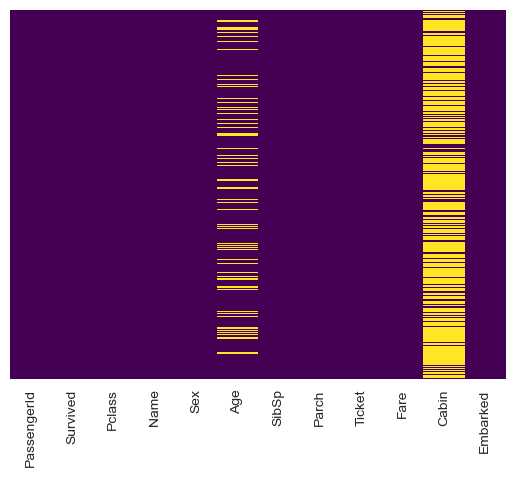

In [87]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

C:\Users\SiphenathiNdevu\AppData\Local\Temp\ipykernel_50896\3822054136.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




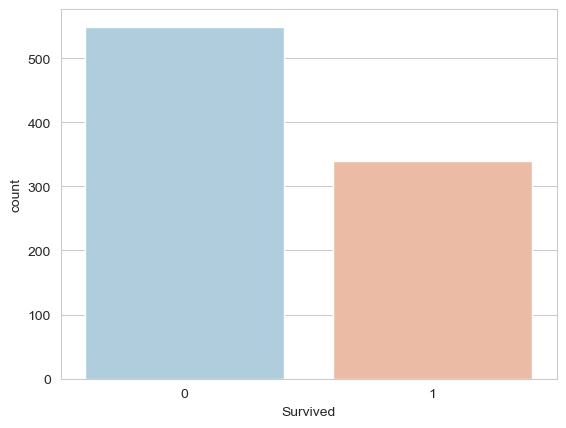

In [137]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')
plt.show()

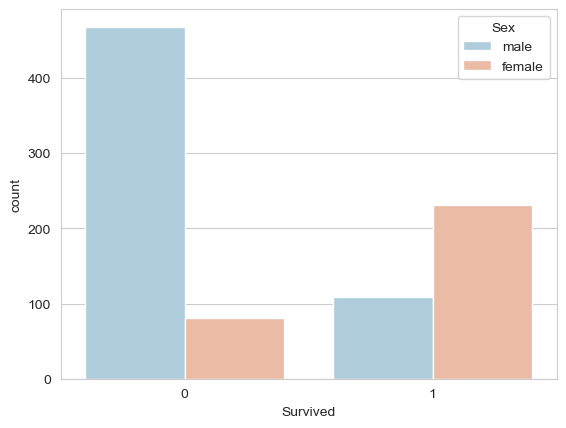

In [138]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

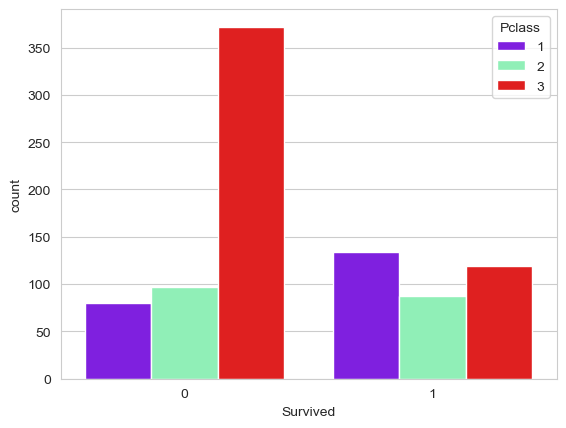

In [139]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

C:\Users\SiphenathiNdevu\AppData\Local\Temp\ipykernel_50896\3762985708.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




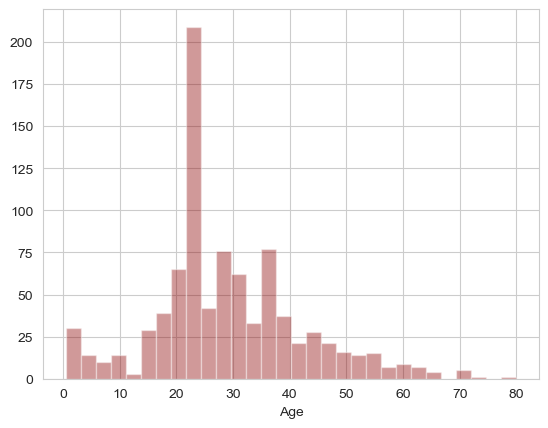

In [140]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

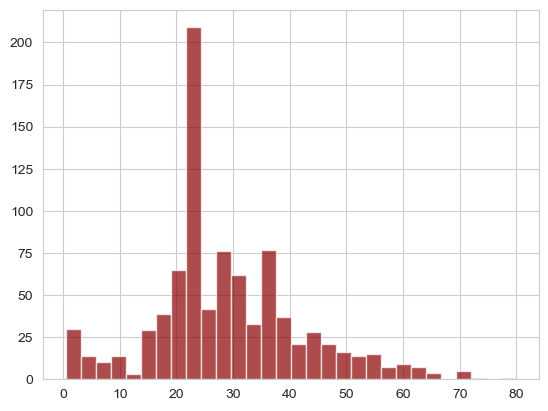

In [141]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)
plt.show()

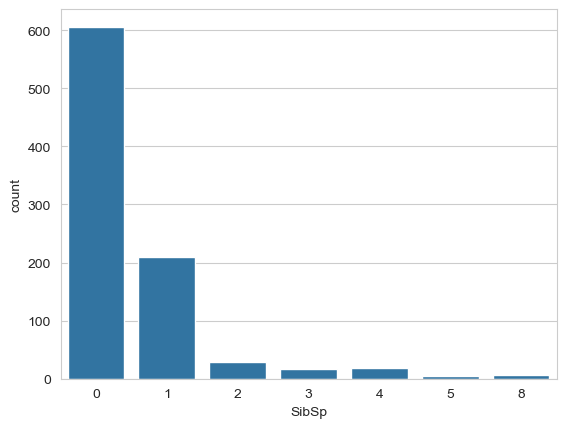

In [142]:
sns.countplot(x='SibSp',data=train)
plt.show()

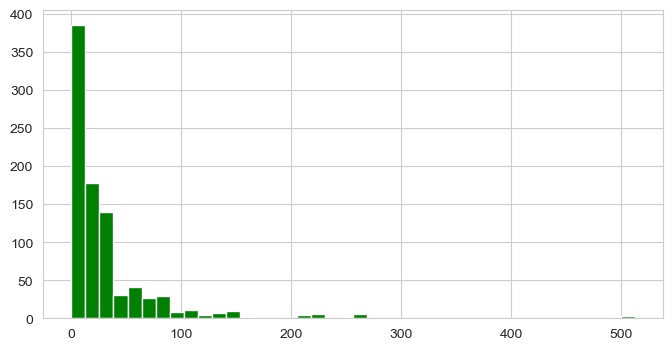

In [143]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
import cufflinks as cf
import plotly.offline as pyo

cf.go_offline()

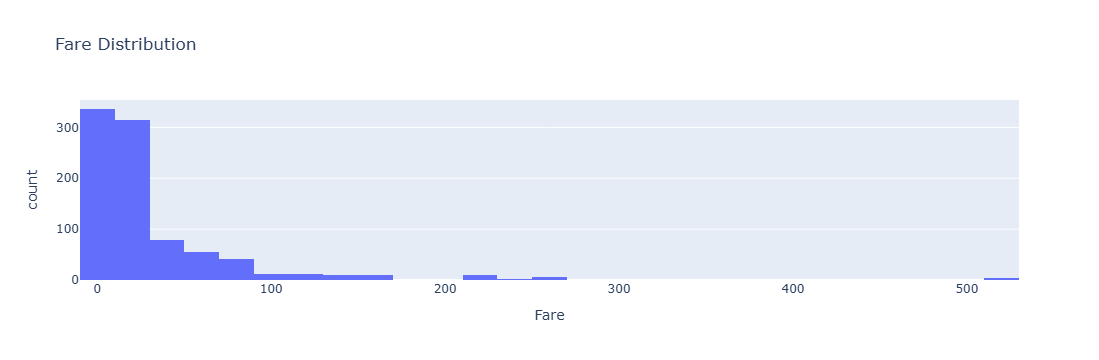

In [145]:
# Plot histogram interactively
# Make sure no matplotlib plt.show() here.
import plotly.express as px

fig = px.histogram(train.dropna(subset=['Fare']), x='Fare',
                   nbins=50, title='Fare Distribution')
fig.show()

C:\Users\SiphenathiNdevu\AppData\Local\Temp\ipykernel_50896\479824109.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




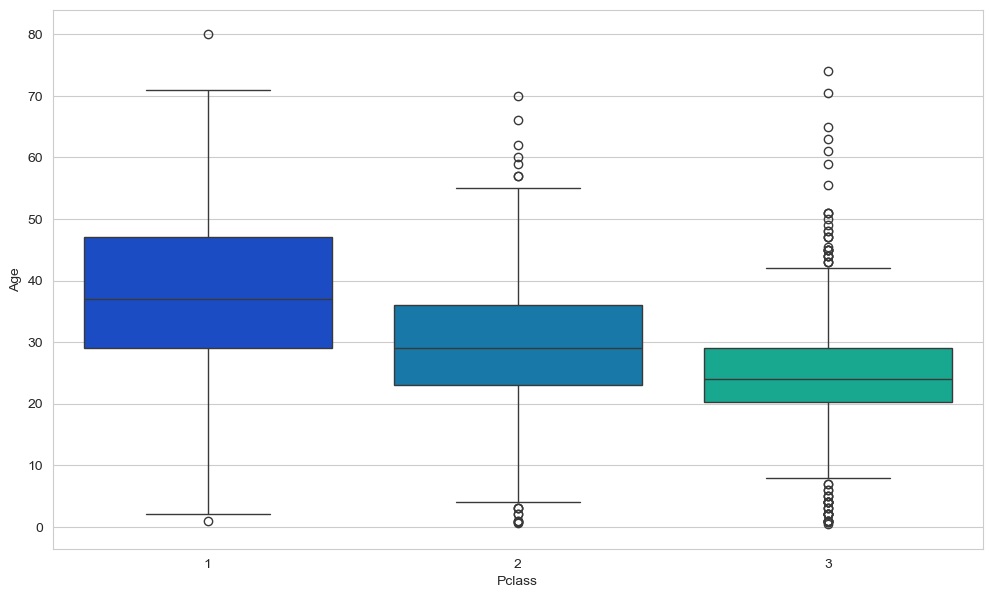

In [146]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

In [147]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [148]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\SiphenathiNdevu\AppData\Local\Temp\ipykernel_50896\822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\SiphenathiNdevu\AppData\Local\Temp\ipykernel_50896\822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



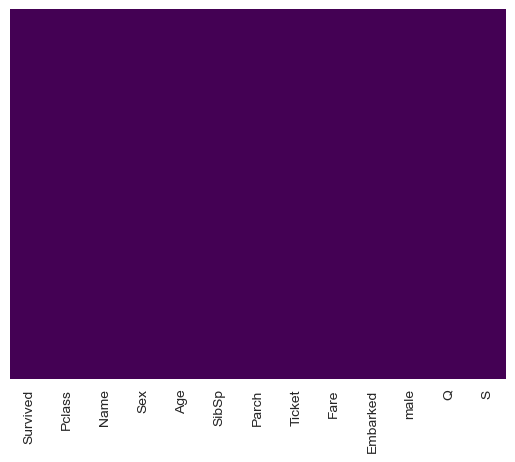

In [149]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [151]:
train.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [102]:
train.dropna(inplace=True)

In [152]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
 10  male      889 non-null    bool   
 11  Q         889 non-null    bool   
 12  S         889 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(4)
memory usage: 79.0+ KB


In [154]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [155]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [156]:
train = pd.concat([train,sex,embark],axis=1)

In [157]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


Great! Our data is ready for our model!

Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

Train Test Split

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\SiphenathiNdevu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [162]:
predictions = logmodel.predict(X_test)

In [163]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

